1.9544013916028442


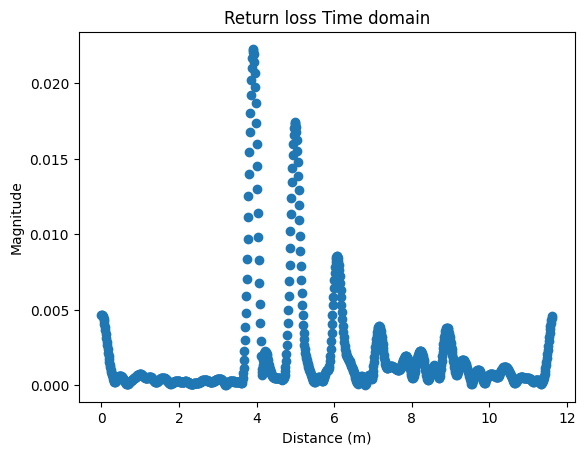

In [1]:
import skrf as rf
import matplotlib.pyplot as plt
from scipy import constants
import numpy as np
 
raw_points = 101
NFFT = 1000
PROPAGATION_SPEED = 65.9 #For RG58
 
_prop_speed = PROPAGATION_SPEED/100
cable = rf.Network('uncoated_air.s1p')
 
s11 = cable.s[:, 0, 0]
window = np.blackman(raw_points)
s11 = window * s11
td = np.abs(np.fft.ifft(s11, NFFT))


#Calculate maximum time axis
t_axis = np.linspace(0, 1/cable.frequency.step, NFFT)
d_axis = constants.speed_of_light * _prop_speed * t_axis
 
#find the peak and distance
pk = np.max(td)
idx_pk = np.where(td == pk)[0]
print(d_axis[idx_pk[0]]/2)
 
# Plot time response
plt.scatter(d_axis, td)
plt.xlabel("Distance (m)")
plt.ylabel("Magnitude")
plt.title("Return loss Time domain")
plt.show()

In [14]:
from scipy.signal import convolve

v=PROPAGATION_SPEED/100
FFT_POINTS =2**14
cable = rf.Network('coated_air.s1p')
s11_ = cable.s[:,0,0]
#s11_gated = s11_.time_gate(span=100, t_unit='s')
#s11_gate=s11_gated.s[:,0,0]
window = np.blackman(101)

windowed_s11 = window * s11_
td = np.abs(np.fft.ifft(windowed_s11, FFT_POINTS))
step = np.ones(FFT_POINTS)
step_response = convolve(td, step)

step_response_Z = 50 * (1 + step_response) / (1 - step_response)
step_response_Z=step_response_Z[:FFT_POINTS]
time_axis = np.linspace(0, 1 / cable.frequency.step, FFT_POINTS)
distance_axis = time_axis * v * constants.speed_of_light
# peak = np.max(td)
# We should check that this is an actual *peak*, and not just
# a vague maximum
index_peak = np.argmax(td)
cable_len = round(distance_axis[index_peak] / 2, 3)

In [15]:
s11_=cable.s[:,0,0]

In [16]:
len(s11_)

101

In [17]:
impulse_response = np.zeros(len(s11_))
impulse_response[0] = 1

# Perform Fourier transform to convert impulse response to frequency domain
frequency_domain_impulse_response = np.fft.fft(impulse_response)
# Multiply frequency-domain impulse response by frequency response of the circuit
frequency_domain_tdr_response = frequency_domain_impulse_response * s11_
# Perform inverse Fourier transform to convert back to time domain
tdr_response = np.fft.ifft(frequency_domain_tdr_response)

# Take the real part to obtain the virtual TDR response
tdr_response = np.real(tdr_response)

from scipy import signal

# Define filter parameters
cutoff_frequency = 5000  # Define your cutoff frequency in Hz
sampling_frequency = 50000  # Define your sampling frequency in Hz
filter_order = 1  # Define the filter order (e.g., Butterworth filter)

# Calculate the normalized cutoff frequency
normalized_cutoff = cutoff_frequency / (sampling_frequency / 2)

# Design the low-pass filter
b, a = signal.butter(filter_order, normalized_cutoff, btype='low')

# Apply the filter to the TDR response
filtered_tdr_response = signal.lfilter(b, a, tdr_response)

In [18]:
len(tdr_response)

101

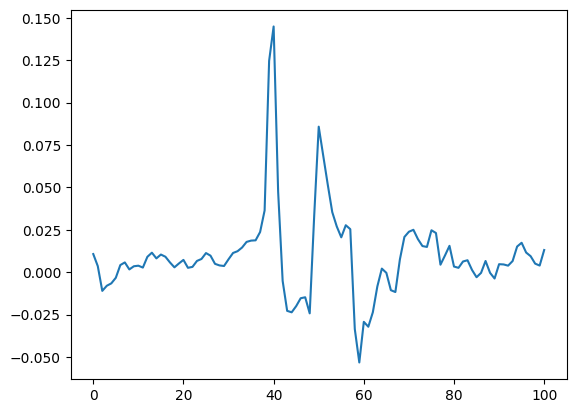

In [19]:
plt.plot(filtered_tdr_response)

In [20]:
v=PROPAGATION_SPEED/100
FFT_POINTS =2**14
cable = rf.Network('uncoated_air.s1p')
s11_ = cable.s11
s11_gated = s11_.time_gate(span=100, t_unit='s',window='hamming', mode='bandstop', method='fft')
s11_gate=s11_gated.s[:,0,0]

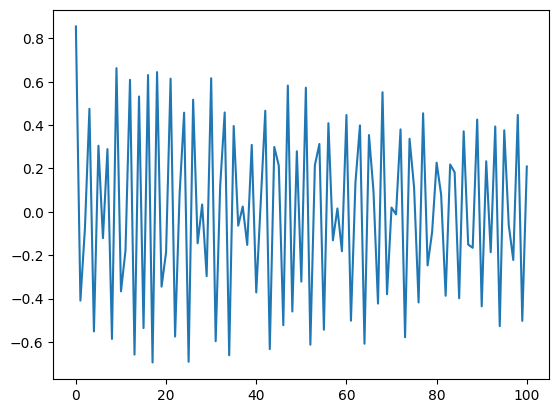

In [21]:
plt.plot(s11_gate)



In [10]:
cable_len

1.954

In [11]:
rf.time.find_n_peaks(s11, 5)

[51, 47, 42, 56, 54]

In [12]:
rf.time.detect_span(s11_, t_unit='ns')

5.241854812852678

AttributeError: 'numpy.ndarray' object has no attribute 'plot_s_db'

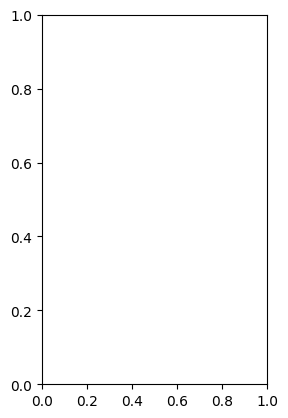

In [49]:
# plot frequency and time-domain s-parameters
plt.subplot(121)
s11_.plot_s_db()
s11_gated.plot_s_db()
plt.title('Frequency Domain')

plt.subplot(122)
s11_.plot_s_db_time()
s11_gated.plot_s_db_time()
plt.title('Time Domain')
plt.tight_layout()

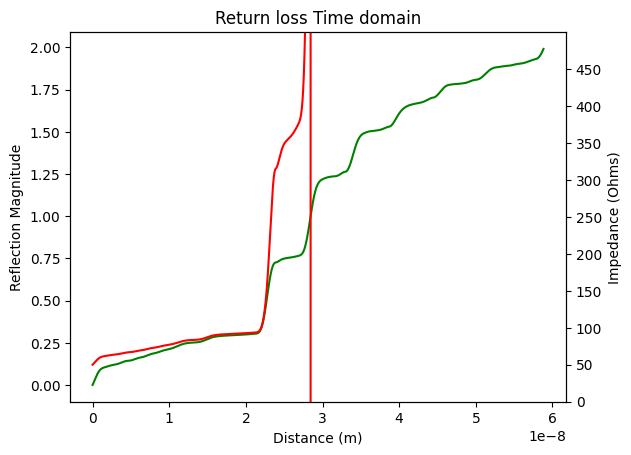

In [22]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
#ax2.set_xlim([0,3.8])
ax2.set_ylim([0, 500])
ax2.yaxis.set_ticks(np.arange(0, 500, 50))
ax1.plot(time_axis, step_response[:FFT_POINTS], 'g-')
ax2.plot(time_axis, step_response_Z, 'r-')
ax1.set_xlabel("Distance (m)")
ax1.set_ylabel("Reflection Magnitude")
ax2.set_ylabel("Impedance (Ohms)")
ax1.set_title("Return loss Time domain")
plt.show()

### Impendance


0.2324132036837159


C:\Users\echry\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\echry\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


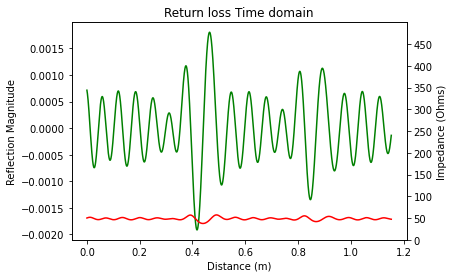

In [ ]:
import skrf as rf
import matplotlib.pyplot as plt
from scipy import constants
import numpy as np
 
raw_points = 101
NFFT = 16384
PROPAGATION_SPEED = 65.9
Zo = 50
 
_prop_speed = PROPAGATION_SPEED / 100
cable = rf.Network('sensor.s1p')
 
s11 = cable.s[:, 0, 0]
window = np.blackman(raw_points)
s11 = window * s11
td = np.fft.ifft(s11, NFFT)
 
# Create step waveform and compute step response
step = np.ones(NFFT)
step_response = np.convolve(td, step)
step_response_Z = Zo * (1 + step_response) / (1 - step_response)
step_response_Z = step_response_Z[:16384]
 
# Calculate maximum time axis
t_axis = np.linspace(0, 1 / cable.frequency.step, NFFT)
d_axis = constants.speed_of_light * _prop_speed * t_axis
 
# find the peak and distance
pk = np.max(td)
idx_pk = np.where(td == pk)[0]
print(d_axis[idx_pk[0]] / 2)
 
# Plot time response
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.set_ylim([0, 500])
ax2.yaxis.set_ticks(np.arange(0, 500, 50))
ax1.plot(d_axis[0:4209], td[0:4209], 'g-')
ax2.plot(d_axis[0:4209], step_response_Z[0:4209], 'r-')
ax1.set_xlabel("Distance (m)")
ax1.set_ylabel("Reflection Magnitude")
ax2.set_ylabel("Impedance (Ohms)")
ax1.set_title("Return loss Time domain")
plt.show()

In [ ]:
d_axis[0:4209]

array([0.00000000e+00, 1.33996762e-03, 2.67993525e-03, ...,
       5.63590382e+00, 5.63724379e+00, 5.63858376e+00])